## ASEN6008 HW1

# Imports

In [1]:
import numpy as np
from astro_constants import AU_KM, MU_SUN_KM, MU_EARTH_KM, MU_MARS_KM, R_EARTH_KM, R_MARS_KM
import propagators
import matplotlib.pyplot as plt

# Starting Work

In [2]:
#Sun centric velocities on transfer orbit
alt = 400 #km
a_earth = AU_KM
a_mars  = 1.52368*AU_KM
rp = a_earth
ra = a_mars
a_orb = (rp+ra)/2
vp = np.sqrt(MU_SUN_KM*(2/rp-1/a_orb))
va = np.sqrt(MU_SUN_KM*(2/ra-1/a_orb))
#Planet Velocities
vE = np.sqrt(MU_SUN_KM/a_earth)
vM = np.sqrt(MU_SUN_KM/a_mars)
#excess velocities
v_inf_E = abs(vE-vp)
v_inf_M = abs(vM-va)
#hyperbolic SMA's of planets
a_hypE = -MU_EARTH_KM/v_inf_E
a_hypM = -MU_MARS_KM/v_inf_M
#Delta V's
dvE = np.sqrt(MU_EARTH_KM*(2/(alt+R_EARTH_KM) - 1/a_hypE)) - np.sqrt(MU_EARTH_KM/(alt+R_EARTH_KM))
dvM = np.sqrt(MU_MARS_KM/(alt+R_MARS_KM)) - np.sqrt(MU_MARS_KM*(2/(alt+R_MARS_KM) - 1/a_hypM))
#Transfer Time
T = 2*np.pi*np.sqrt(a_orb**3/MU_SUN_KM)/2 #seconds
tof = T/86400 #days

print(f'vp={vp}\nva={va}\ndvE={dvE}\ndvM={dvM}\nT={T}\nTOF={tof}\n')


vp=32.72938534360932
va=21.48048497296632
dvE=3.3113446436844596
dvM=-1.6623718219792067
T=22366014.864188485
TOF=258.86591277995933



# Propagation

In [3]:
# now all the starting conditions
rE_vec = [-578441.002878924, -149596751.684464, 0]
vE_vec = [29.7830732658560, -0.115161262358529, 0]
E_vec = np.concatenate((rE_vec,vE_vec), axis = None)
rM_vec = [-578441.618274359, 227938449.869731, 0]
vM_vec = [-24.1281802482527, -0.0612303173808154, 0]
M_vec = np.concatenate((rM_vec,vM_vec), axis=None)
rSC_vec = [0,-a_earth,0]
vSC_vec = [vp,0,0]
sc_vec = np.concatenate((rSC_vec,vSC_vec), axis=None)
sol = propagators.ode_solve(propagators.twoBody, tspan=[0,-T], init_state=M_vec, args=MU_SUN_KM)
M_init = sol.y[:,-1]
mus = [MU_SUN_KM, MU_EARTH_KM, MU_MARS_KM]
init_states = np.concatenate((sc_vec, E_vec, M_vec), axis=None)

#propagate two-bodies
tspan = np.linspace(0,T,int(1e4))
sol = propagators.ode_solve(propagators.twoBody, tspan=tspan, init_state=sc_vec, args=MU_SUN_KM)
sc_arr = sol.y
sc_pos = sc_arr[range(3),:]
sol = propagators.ode_solve(propagators.twoBody, tspan=tspan, init_state=E_vec, args=MU_SUN_KM)
E_arr = sol.y
E_pos = E_arr[range(3),:]
sol = propagators.ode_solve(propagators.twoBody, tspan=tspan, init_state=M_init, args=MU_SUN_KM)
M_arr = sol.y
M_pos = M_arr[range(3),:]

#now the non-ideal case
sol = propagators.ode_solve(propagators.nBody, tspan=tspan, init_state=init_states, args=[mus])
pert_arr = sol.y[range(6),:]
pert_pos = pert_arr[range(3),:]
diff_arr = abs(pert_arr - sc_arr)

# Plotting Time

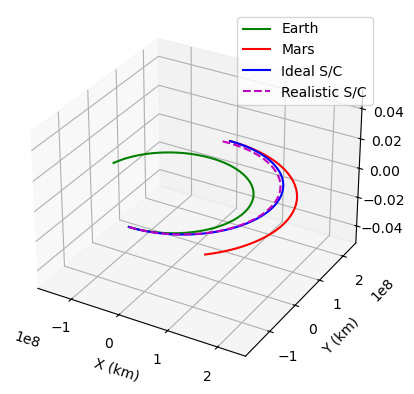

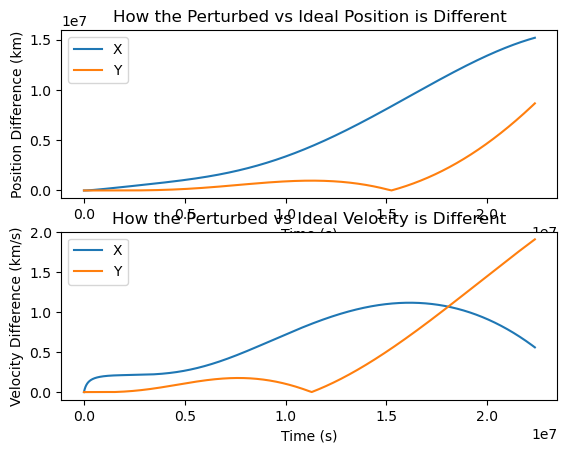

In [4]:
# Plotting Time
plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(E_pos[0,:], E_pos[1,:], E_pos[2,:], label='Earth', color='g')
ax.plot3D(M_pos[0,:], M_pos[1,:], M_pos[2,:], label='Mars', color='r')
ax.plot3D(sc_pos[0,:], sc_pos[1,:], sc_pos[2,:], label='Ideal S/C', color='b')
ax.plot3D(pert_pos[0,:], pert_pos[1,:], pert_pos[2,:], label='Realistic S/C', color='m', linestyle='--')
ax.legend()
plt.xlabel('X (km)')
plt.ylabel('Y (km)')


plt.figure()
plt.subplot(2,1,1)
plt.plot(tspan, diff_arr[0,:], label='X')
plt.plot(tspan, diff_arr[1,:], label='Y')
plt.legend()
plt.ylabel('Position Difference (km)')
plt.xlabel('Time (s)')
plt.title('How the Perturbed vs Ideal Position is Different')
plt.subplot(2,1,2)
plt.plot(tspan, diff_arr[3,:], label='X')
plt.plot(tspan, diff_arr[4,:], label='Y')
plt.legend()
plt.ylabel('Velocity Difference (km/s)')
plt.xlabel('Time (s)')
plt.title('How the Perturbed vs Ideal Velocity is Different')

plt.show()